## Case Study - Spam Detection

Major Steps Involved:

1. Text Data Visualisation
2. Text Data Preprocessing
3. Text Data Vectorization - Text To Numerical Representation using Bag of Words

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Step 1 - Load the Data

In [5]:
df = pd.read_csv("/content/email_data.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


### Step 2 - Exploratry Data Analysis

In [6]:
df.shape

(5171, 4)

#### Exploring the Data Distribution/ Target Variable

In [10]:
df["label"].value_counts()

,count
label,
ham,3672
spam,1499


In [12]:
df["label"].value_counts(normalize=True) #Gives you parcentage

,proportion
label,
ham,0.710114
spam,0.289886


<Axes: xlabel='label', ylabel='count'>

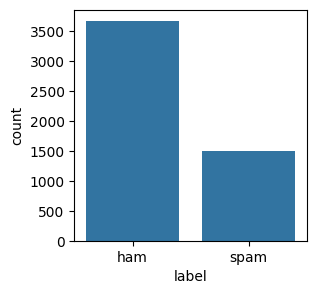

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.countplot(data=df, x="label")

#### Visualizing the distribution of most frequent words

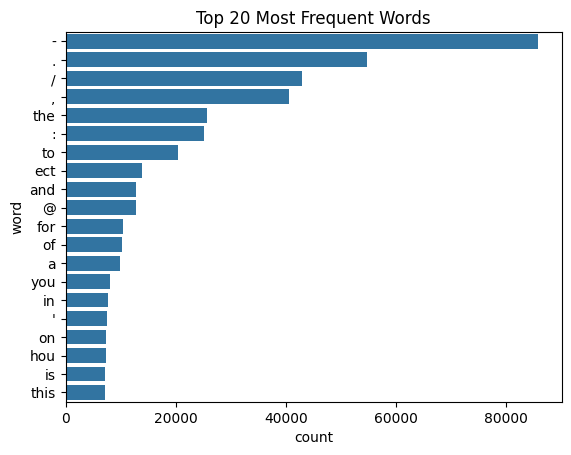

In [18]:
from collections import Counter

# Get all words in the text
all_words = " ".join(df["text"].values).split()
word_counts = Counter(all_words)

# Get the most common words
common_words = word_counts.most_common(20)

# Convert to Dataframe for plotting
common_words_df = pd.DataFrame(common_words, columns=["word", "count"])

# Plotting the most common words
sns.barplot(data=common_words_df, x="count", y="word")
plt.title("Top 20 Most Frequent Words")
plt.show()

#### Classwise WordCloud - (Exploring the Relationship between each pair of inputs and outouts)

In [19]:
!pip install wordcloud

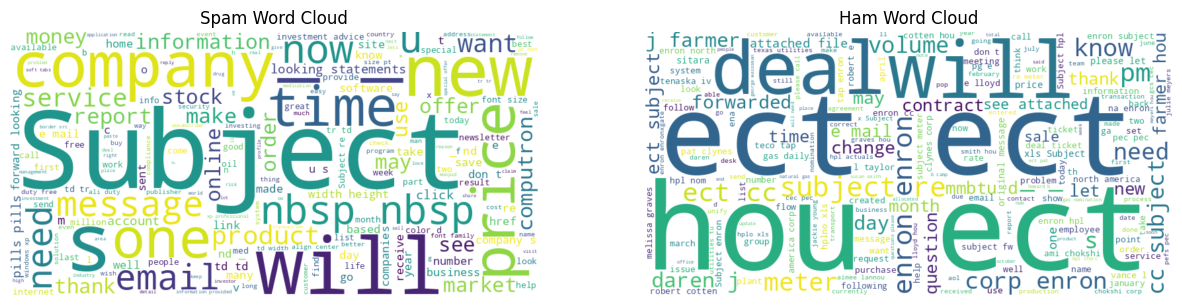

In [21]:
from wordcloud import WordCloud

# Word cloud for spam messages
spam_text = " ".join(df[df["label"] == "spam"]["text"].values)
spam_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(spam_text)

# Word Cloud for ham message
ham_text = " ".join(df[df["label"] == "ham"]["text"].values)
ham_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(ham_text)

# Display the word clouds
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].imshow(spam_wordcloud, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("Spam Word Cloud")
ax[1].imshow(ham_wordcloud, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("Ham Word Cloud")
plt.show()